# Model-Free Prediction and Control
### This Jupyter Notebook is created for visualization purposes

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Courier New"
import copy

from maze_class import Maze
from monte_carlo import *
from td_learning import *
from plot_functions import plot_grid, q_table, plot_q_table

import sys
sys.path.append('/Users/wolfsinem/as/iteration/')

from value_iteration import *

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Monte Carlo

#### Initialise parameters

In [2]:
MAX_EP = 3000
STEP_COST = -0.1
MAX_EP_LEN = 30

maze_coords = {
    "[0, 0]": 0, "[0, 1]": 1, "[0, 2]": 2, "[0, 3]": 3,
    "[1, 0]": 4, "[1, 1]": 5, "[1, 2]": 6, "[1, 3]": 7,
    "[2, 0]": 8, "[2, 1]": 9, "[2, 2]": 10, "[2, 3]": 11,
    "[3, 0]": 12, "[3, 1]": 13, "[3, 2]": 14, "[3, 3]": 15
}

reversed_maze = {
    "0": [0, 0], "1": [0, 1], "2": [0, 2], "3": [0, 3],
    "4": [1, 0], "5": [1, 1], "6": [1, 2], "7": [1, 3],
    "8": [2, 0], "9": [2, 1], "10": [2, 2], "11": [2, 3],
    "12": [3, 0], "13": [3, 1], "14": [3, 2], "15": [3, 3],
}

#### Evironment

In [3]:
env = Maze(maze_coords,reversed_maze, step_cost=STEP_COST, max_ep_length=MAX_EP_LEN)

#### Visualize rewards

#### Factor 1

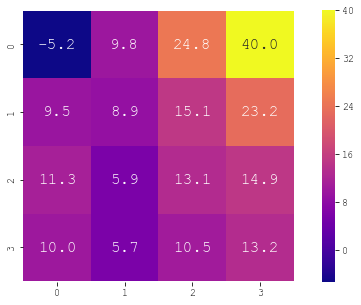

In [4]:
mc_1 = mc_evaluation_policy(env, discount_factor=1)
plot_grid(mc_1.reshape((4,4)))

In [5]:
policy = optimal_policy(mc_1.reshape(4,4))
maze_grid(policy, True)

| →     | →     | →     | F     |
| ↓     | →     | ↑     | ↑     |
| ←     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

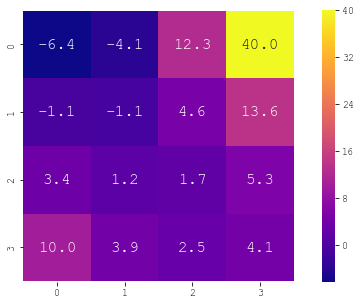

In [6]:
mc_2 = mc_evaluation_policy(env, discount_factor=0.9)
plot_grid(mc_2.reshape((4,4)))

In [7]:
policy = optimal_policy(mc_2.reshape(4,4))
maze_grid(policy, True)

| ↓     | →     | →     | F     |
| ↓     | →     | →     | ↑     |
| ↓     | ↓     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## TD Learning

#### Factor 1

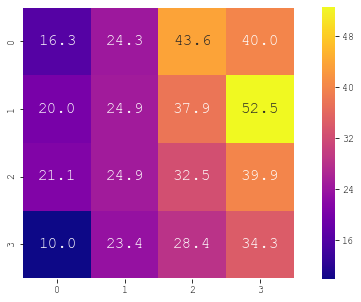

In [8]:
td_1 = td_learning(env, discount_factor=1)
plot_grid(td_1.reshape((4,4)))

In [9]:
policy = optimal_policy(td_1.reshape(4,4))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | →     | →     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

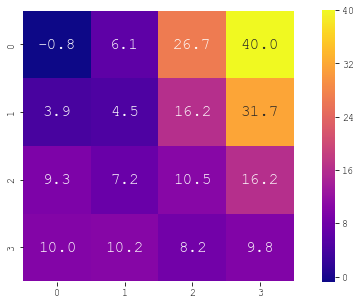

In [10]:
td_2 = td_learning(env, discount_factor=0.9)
plot_grid(td_2.reshape((4,4)))

In [11]:
policy = optimal_policy(td_2.reshape(4,4))
maze_grid(policy, True)

| →     | →     | →     | F     |
| ↓     | →     | →     | ↑     |
| ↓     | ↓     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## On-policy first-visit Monte-Carlo Control

In [12]:
def return_max_rewards(lst):
    """This function returns a miltidimensional array out of the results in the grid.
    It takes the max value. 
    """
    rewards = []
    for i in range(16):
        rewards.append(max(lst[i]))

    rewards = np.array(rewards).reshape(4, 4)
    return rewards

#### Initialize rewards lists 

In [13]:
rewards = rewards_lists(16,4)

#### Visualize Q-Table

#### Factor 1

In [14]:
# Factor 1
grid_values = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=1, rewards=rewards)
print(grid_values)

[[ 10.05714286   0.          18.35         0.        ]
 [-75.1         39.9          0.           9.7       ]
 [-75.4         40.           0.          19.3       ]
 [ 40.          40.          40.          40.        ]
 [ 18.35        -2.36666667  29.53333333  19.4       ]
 [  6.96666667  39.66        39.58         7.95      ]
 [ 25.57368421  39.8518732   38.47857143  34.98518519]
 [ 40.          39.86756757  39.45185185  38.96052632]
 [ 12.23333333  36.74166667  10.          18.45      ]
 [ 29.06842105  39.38325359  34.35454545  26.97058824]
 [ 38.25443038  39.47047894  38.62879581  37.92771739]
 [ 39.7911879   38.8398773   38.22682927  38.63374233]
 [ 10.          10.          10.          10.        ]
 [ 33.52608696  38.92587065  32.01333333  10.        ]
 [ 39.22320988  38.4255102   37.70322581  33.49414894]
 [ 36.31052632  36.29310345  35.52058824  38.62111801]]


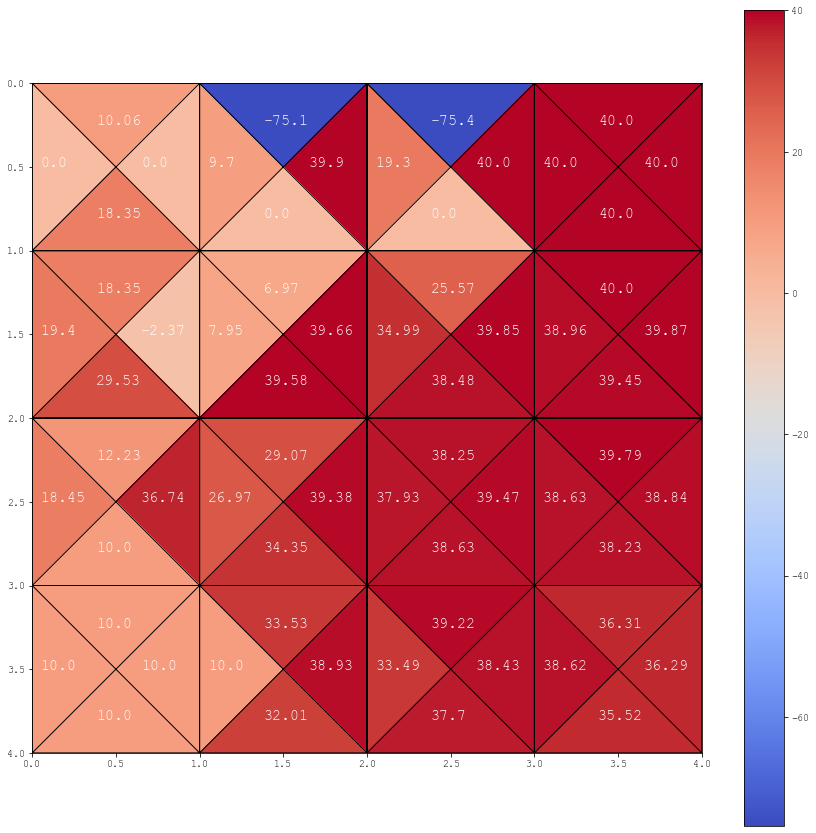

In [15]:
plot_q_table(grid_values)

In [16]:
policy = optimal_policy(return_max_rewards(grid_values))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | ↑     | ↑     |
| →     | →     | ↑     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.99

In [17]:
# Factor 0.9
grid_values_2 = first_visit_mc(env=env, max_ep=MAX_EP, discount_factor=0.9, rewards=rewards)
print(grid_values_2)

[[  7.23433986   0.           0.           0.        ]
 [-66.47099344  37.5          0.           0.        ]
 [-55.41175416  40.          26.4995405   20.30333333]
 [ 40.          40.          40.          40.        ]
 [  8.54031175   0.           0.           0.        ]
 [  1.22728971  33.27271535  30.66437531   4.88798694]
 [ 31.33475     36.224133    30.019724    27.25255765]
 [ 40.          35.724854    33.26571237  33.81942354]
 [ 10.37195236  29.6894683    0.           0.        ]
 [ 28.72720588  32.08798239  25.14514039  22.82707786]
 [ 32.7008542   34.22206292  29.17133019  30.38500698]
 [ 36.91006402  33.50173486  28.7052215   31.51323469]
 [ 10.          10.          10.          10.        ]
 [ 27.11554232  30.21211978  20.89737002  10.        ]
 [ 32.04396243  29.24019777  29.98628407  24.69267076]
 [ 28.93462489  27.69554633  27.76512565  30.31520525]]


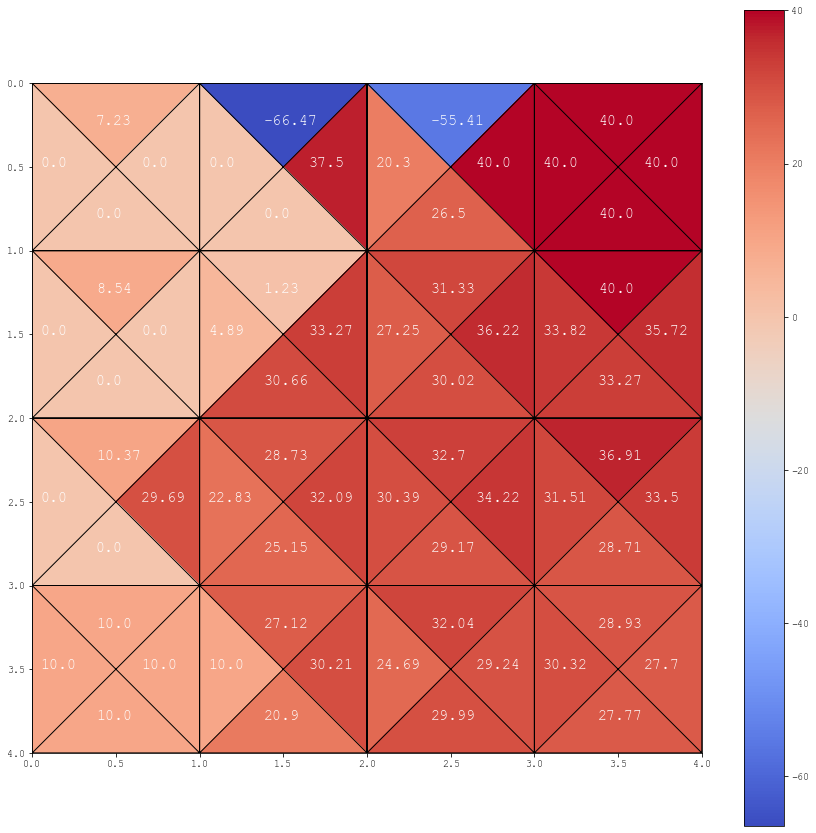

In [18]:
plot_q_table(grid_values_2)

In [19]:
policy = optimal_policy(return_max_rewards(grid_values_2))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | →     | →     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## SARSA

#### Visualize maze rewards

#### Factor 1 

[[1.01835808e+00 1.92678798e+00 6.22819408e+00 6.94184452e-01]
 [4.13102583e-03 3.83902386e+01 1.11091019e+01 7.09019123e-01]
 [3.60650035e+01 7.98056558e+01 3.08782460e+01 2.23771429e+00]
 [4.00000000e+01 4.00000000e+01 4.00000000e+01 4.00000000e+01]
 [1.22990656e+00 1.31323870e+01 1.20720308e+01 5.79818496e+00]
 [2.08898199e+00 3.52426044e+01 1.55408834e+01 6.55421264e+00]
 [4.46651303e+01 5.23437786e+01 2.69708201e+01 1.43102520e+01]
 [7.99999920e+01 5.35045325e+01 4.06369108e+01 3.49995246e+01]
 [6.34453272e+00 1.43415566e+01 1.99920412e+01 1.18011092e+01]
 [1.31795181e+01 2.76792825e+01 1.61989417e+01 1.32098437e+01]
 [3.46868293e+01 3.93299732e+01 2.43217886e+01 1.74832835e+01]
 [5.78411441e+01 4.22786871e+01 3.13602953e+01 2.77002835e+01]
 [1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01]
 [1.68026633e+01 2.55456331e+01 1.65254891e+01 1.99999986e+01]
 [2.82676720e+01 3.25692178e+01 2.59950161e+01 1.70719490e+01]
 [4.04958381e+01 3.20207179e+01 3.11615094e+01 2.559489

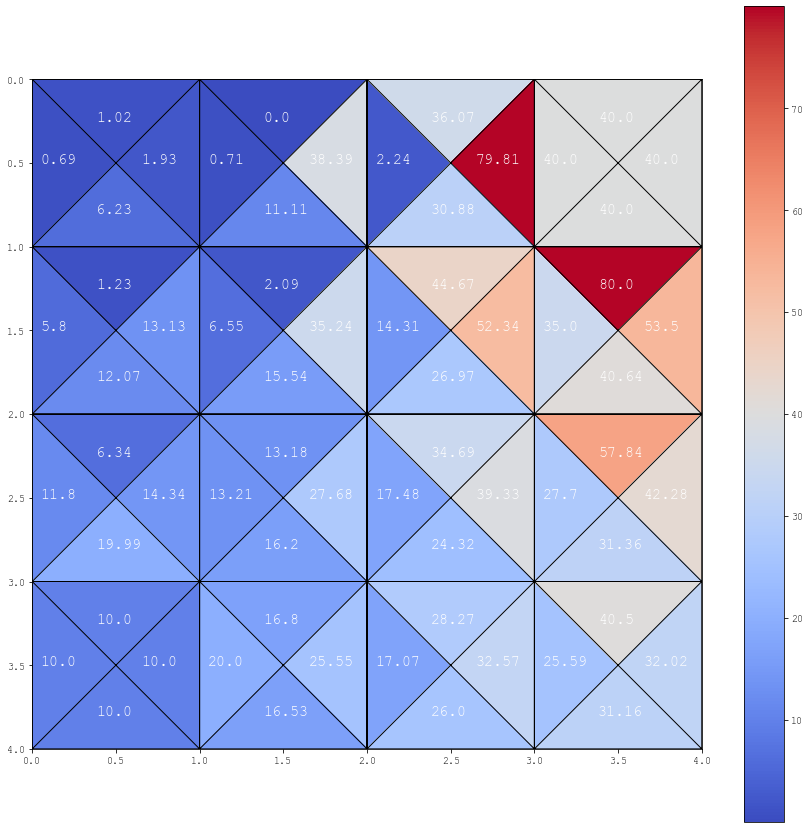

In [20]:
sarsa_1 = sarsa(env=env, discount_factor=1, alpha=0.01)
print(sarsa_1)
plot_q_table(sarsa_1)

In [21]:
policy = optimal_policy(return_max_rewards(sarsa_1))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | →     | →     |
| →     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

[[ 5.46703012  8.81207434 10.72007302  5.66866236]
 [ 7.91380429 39.50435592 14.80765713  5.72244995]
 [40.25662823 76.00188917 28.60112227  8.01716375]
 [40.         40.         40.         40.        ]
 [ 6.27123263 16.1799126  13.07122663  9.73823582]
 [ 7.94477206 28.0338789  13.46148562  9.92654206]
 [37.40876063 45.25140622 18.25535863 14.99628993]
 [76.00000006 40.66076853 24.19594077 27.80673926]
 [10.01022297 13.69312149 19.00431688 13.11621798]
 [15.61449491 18.45552163 10.97831051 12.66836161]
 [27.36607252 23.78721106 13.38331113 13.03663208]
 [41.1963358  25.48139419 16.12379525 17.11849387]
 [10.         10.         10.         10.        ]
 [13.05068303 13.08466853 11.08952178 19.00000019]
 [17.60543763 15.57796023 13.13957365 11.05397496]
 [23.99287507 15.81999386 15.56857349 13.06529385]]


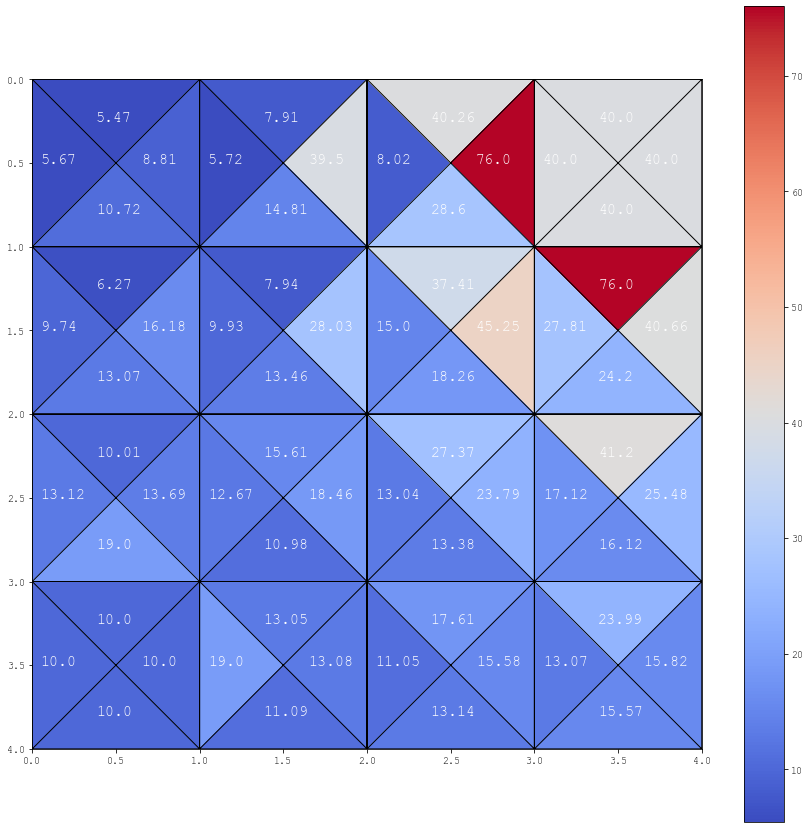

In [22]:
sarsa_2 = sarsa(env=env, discount_factor=0.9, alpha=0.01)
print(sarsa_2)
plot_q_table(sarsa_2)

In [23]:
policy = optimal_policy(return_max_rewards(sarsa_2))
maze_grid(policy, True)

| →     | →     | ↑     | F     |
| →     | →     | ↑     | →     |
| ←     | ↑     | ↑     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



## SARSAMAX, Q-Learning

#### Factor 1

[[12.63890265 23.73022766 50.85397221 12.37619971]
 [42.48812407 78.30519621 52.89135258 21.73401748]
 [75.27600492 79.99769235 71.39121278 56.21031509]
 [40.         40.         40.         40.        ]
 [21.71499405 75.74312298 38.84507309 43.03337536]
 [60.48541247 79.79173152 71.93239592 60.54003646]
 [79.87320596 79.9        79.66308276 79.57110762]
 [80.         79.89645368 79.79138997 79.79321639]
 [43.21441289 75.2912257  19.79031068 38.83434165]
 [78.24188003 79.69843532 75.80368183 67.76228491]
 [79.8        79.79920193 79.59931434 79.58703669]
 [79.9        79.78053743 79.67877116 79.66982517]
 [10.         10.         10.         10.        ]
 [79.34018141 79.59981474 77.40035827 19.99921182]
 [79.7        79.6999991  79.59999982 77.59947237]
 [79.7999999  79.69636472 79.69574804 79.59328246]]


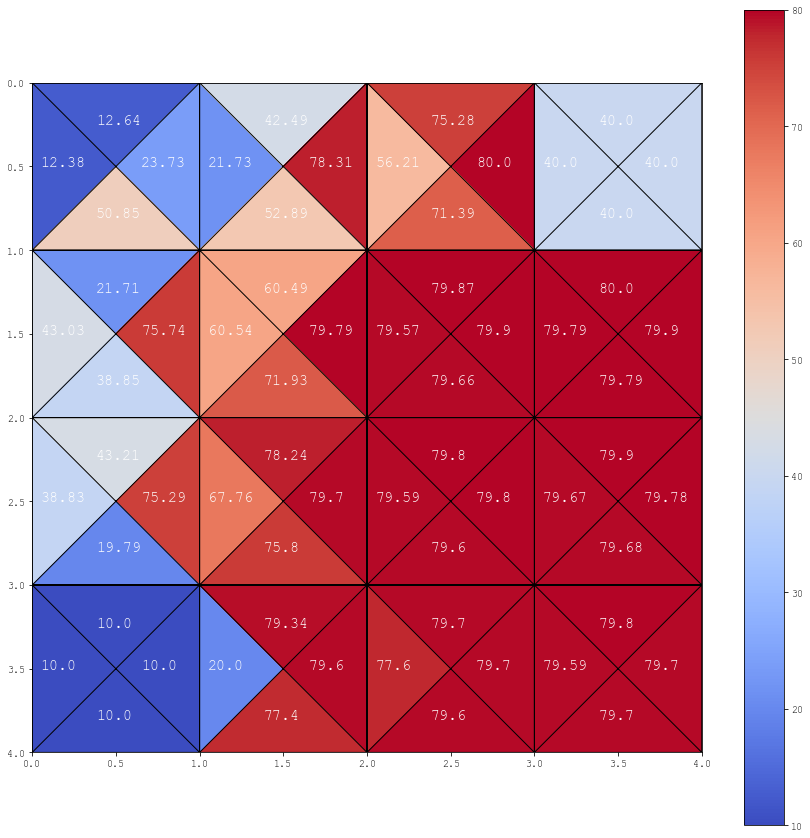

In [24]:
sarsaMAX1 = sarsaMAX(env=env, discount_factor=1, alpha=0.01)
print(sarsaMAX1)
plot_q_table(sarsaMAX1)

In [25]:
policy = optimal_policy(return_max_rewards(sarsaMAX1))
maze_grid(policy, True)

| →     | →     | ←     | F     |
| →     | →     | →     | ↓     |
| ↑     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |



#### Factor 0.9

[[30.77413928 37.65644655 71.66271769 29.4950027 ]
 [57.64578561 79.84207724 69.38099171 45.74738259]
 [79.25494054 79.99999795 78.71778622 68.1110504 ]
 [40.         40.         40.         40.        ]
 [47.43976002 79.48740244 60.77640245 62.23531189]
 [68.94840884 79.79999912 79.10173845 76.95979309]
 [79.89997964 79.9        79.69998822 79.69993742]
 [80.         79.89999964 79.79999961 79.79999922]
 [65.10073181 79.4322838  19.92773851 63.40384416]
 [79.6898614  79.69999999 77.58087885 78.9368317 ]
 [79.8        79.8        79.6        79.59999991]
 [79.9        79.79999628 79.69999793 79.69999703]
 [10.         10.         10.         10.        ]
 [79.599844   79.6        77.59982584 19.99999928]
 [79.7        79.7        79.6        77.6       ]
 [79.8        79.69999986 79.69999993 79.59999975]]


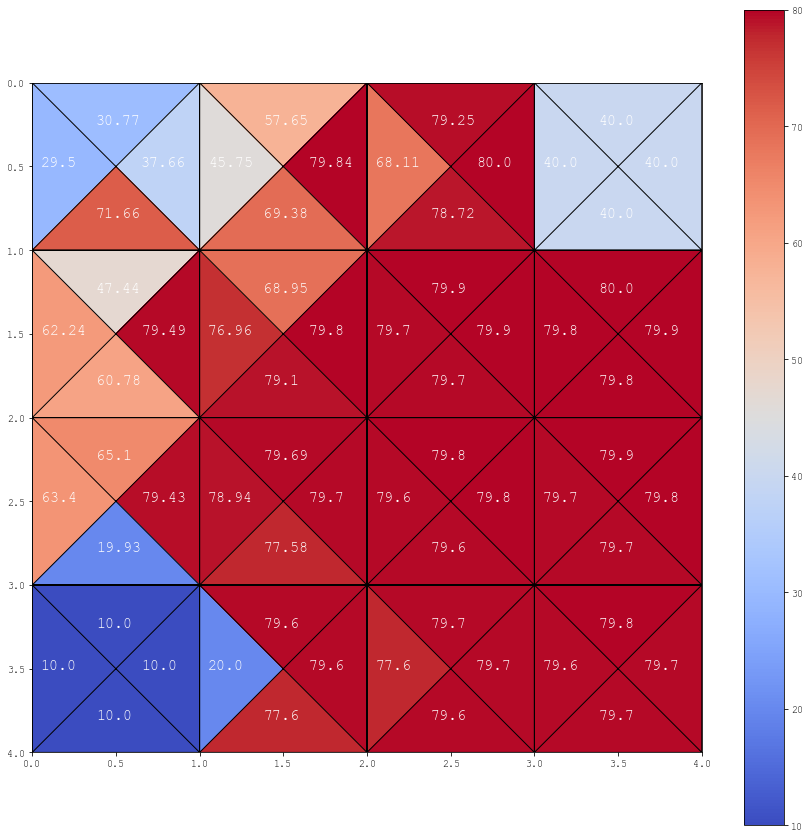

In [26]:
sarsaMAX2 = sarsaMAX(env=env, discount_factor=1, alpha=0.01)
print(sarsaMAX2)
plot_q_table(sarsaMAX2)

In [27]:
policy = optimal_policy(return_max_rewards(sarsaMAX2))
maze_grid(policy, True)

| →     | →     | ←     | F     |
| ↓     | →     | →     | ↓     |
| ↑     | →     | →     | ↑     |
| F     | ↑     | ↑ S   | ↑     |

